### Basic Imports

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import torch
import seaborn as sns
import pandas as pd

dist =torch.distributions

sns.reset_defaults()
sns.set_context(context="talk", font_scale=1)
%matplotlib inline
%config InlineBackend.figure_format='retina'

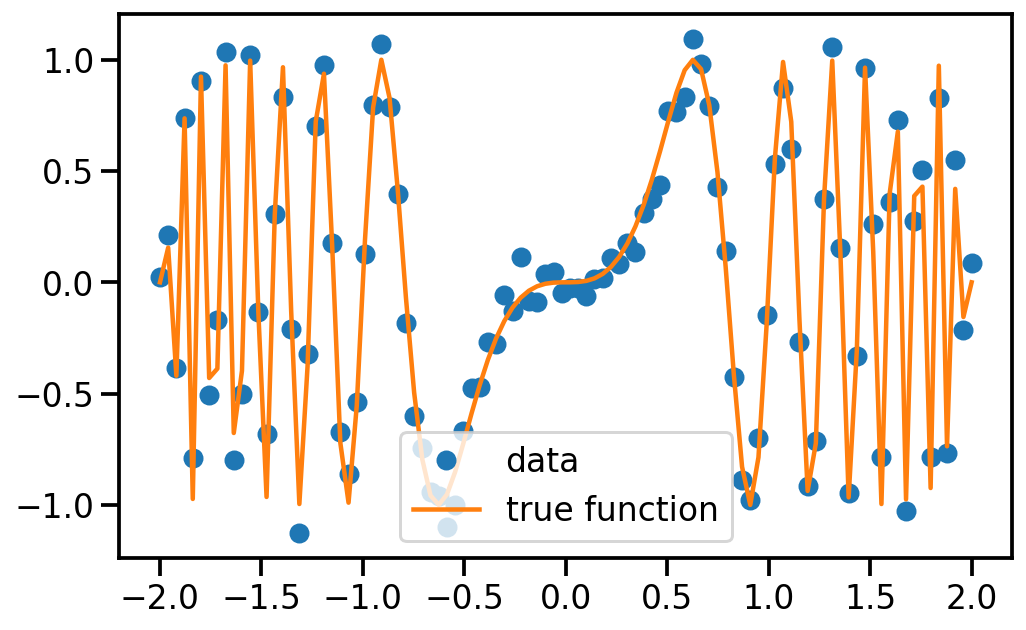

In [6]:
# Generate complex data
x = np.linspace(-2, 2, 100)
freq = lambda x: x**2
f = lambda x: np.sin(2 * np.pi * x * freq(x))
y = f(x) + np.random.randn(x.shape[0]) * 0.1

# Plot
plt.figure(figsize=(8, 5))
plt.plot(x, y, 'o', label='data')
plt.plot(x, f(x), label='true function')
plt.legend()

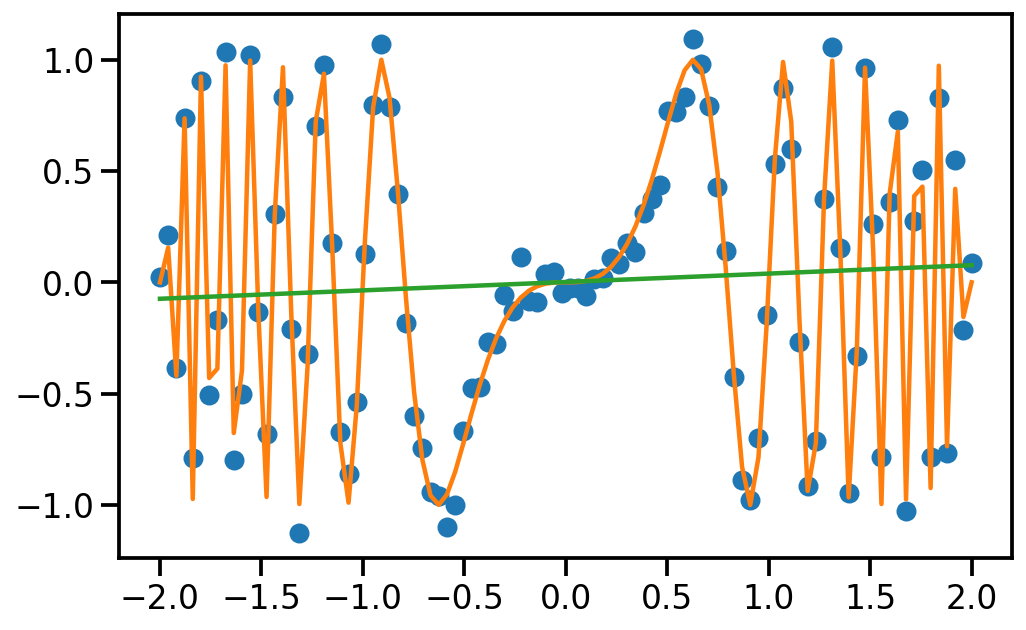

In [108]:
# Learn linear model on data
from sklearn.linear_model import LinearRegression, Ridge

lr1 = Ridge()
lr1.fit(x.reshape(-1, 1), y.reshape(-1, 1))

# Predict on linspace and plot
y_pred = lr1.predict(x.reshape(-1, 1))
plt.figure(figsize=(8, 5))
plt.plot(x, y, 'o', label='data')
plt.plot(x, f(x), label='true function')
plt.plot(x, y_pred, label='linear model')

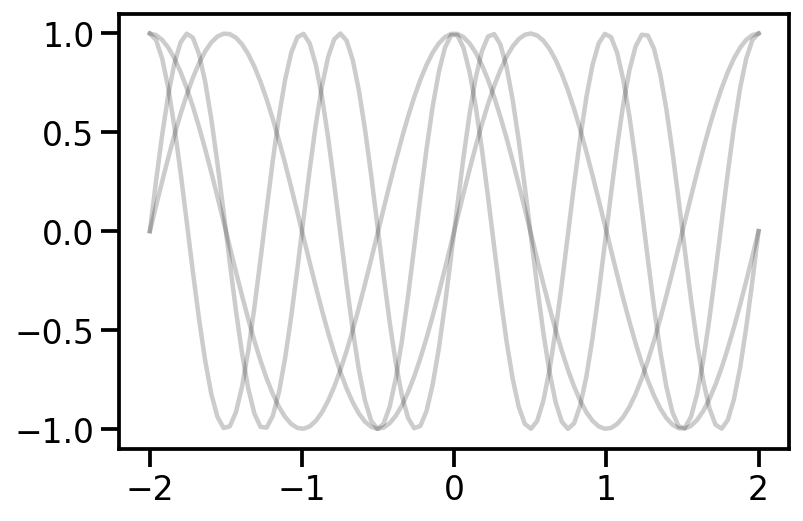

In [109]:
# Add position encoding
# Gamma(x) = [sin(2^0*pi*x), cos(2^0*pi*x), sin(2^1*pi*x), cos(2^1*pi*x), ..., sin(2^k*pi*x), cos(2^k*pi*x)]

def gamma(x, k):
    """
    x: (N, 1)
    k: int
    Output: (N, 2k)
    """
    x = x.reshape(-1, 1)
    x = np.repeat(x, k, axis=1)
    x = x * (2 ** np.arange(k) * np.pi)
    return np.concatenate([np.sin(x), np.cos(x)], axis=1)


plt.plot(x, gamma(x, 2), alpha=0.2, color='k')

In [110]:
# Fit linear model with position encoding for k

def fit_plot(k):
    lr = Ridge()
    X_new = gamma(x, k)
    lr.fit(X_new, y.reshape(-1, 1))
    y_pred = lr.predict(X_new)
    plt.figure(figsize=(8, 5))
    plt.plot(x, y, 'o', label='data')
    plt.plot(x, f(x), label='true function')
    plt.plot(x, y_pred, label='linear model with position encoding of order {}'.format(k), lw=3)
    # Legend outside plot
    plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)

    # Title is the score
    plt.title('Score: {:.2f}'.format(lr.score(X_new, y.reshape(-1, 1))))

    # Show extrapolation also
    # extrapolation points are set difference between linspace and data points
    
    x_extra = np.linspace(-3, 3, 100)
    X_extra = gamma(x_extra, k)
    y_extra = lr.predict(X_extra)
    plt.plot(x_extra, y_extra, '--', label='extrapolation', alpha=0.2)
    plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
    
    

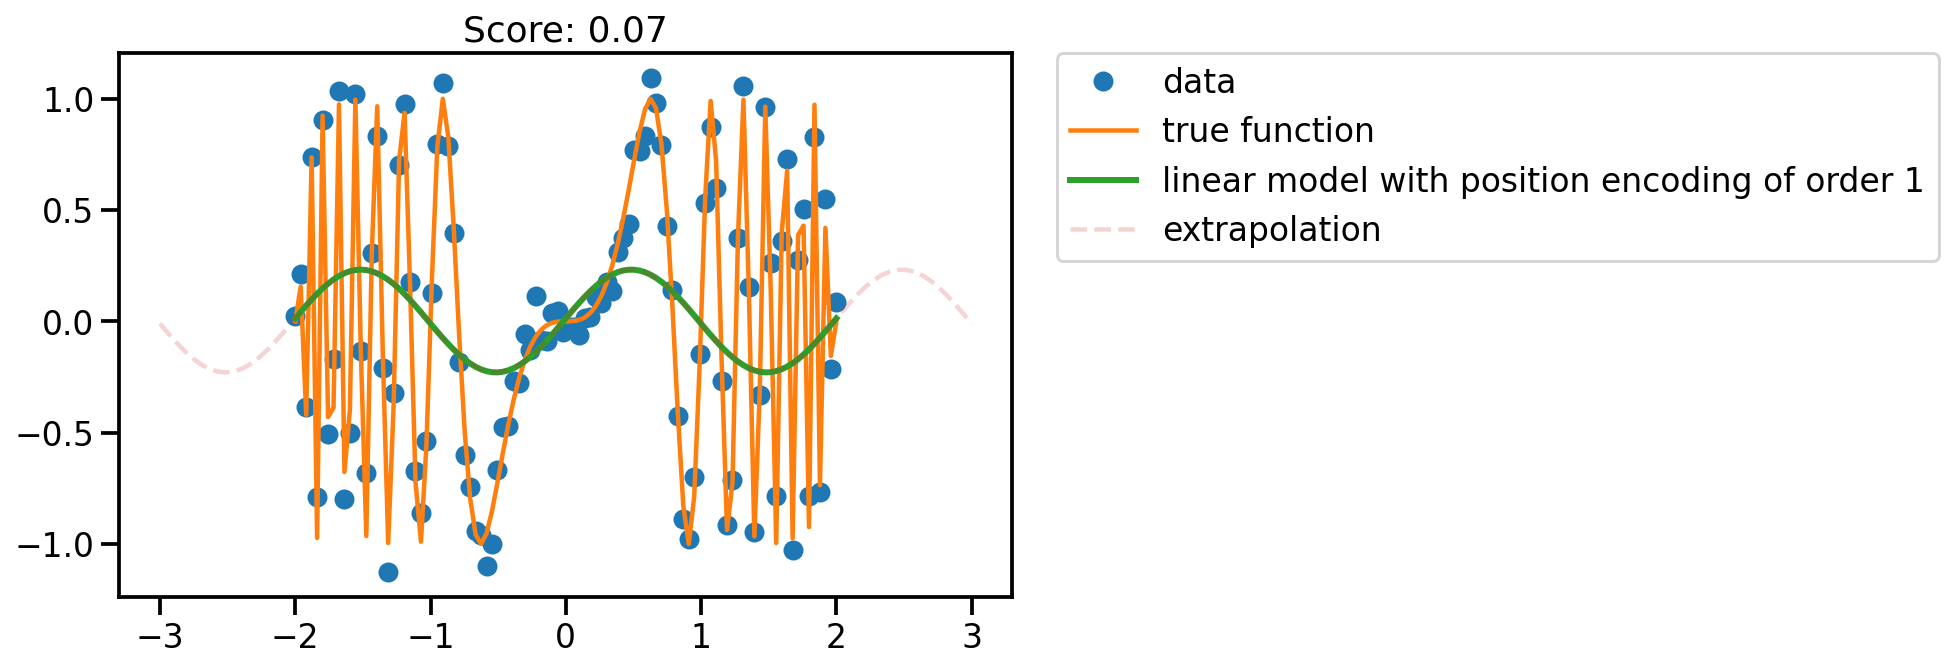

In [111]:
fit_plot(1)

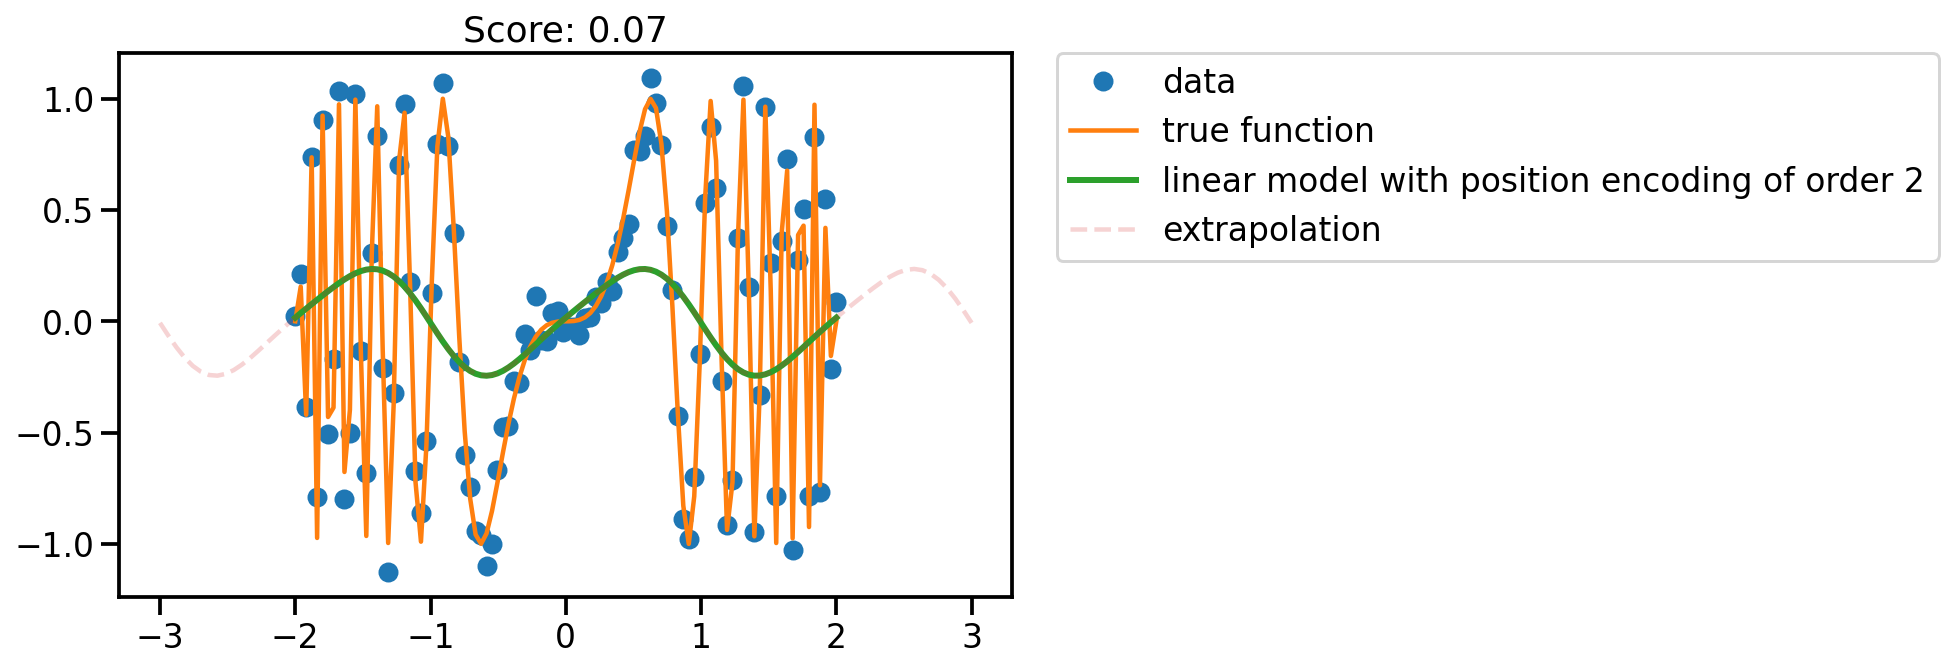

In [112]:
fit_plot(2)

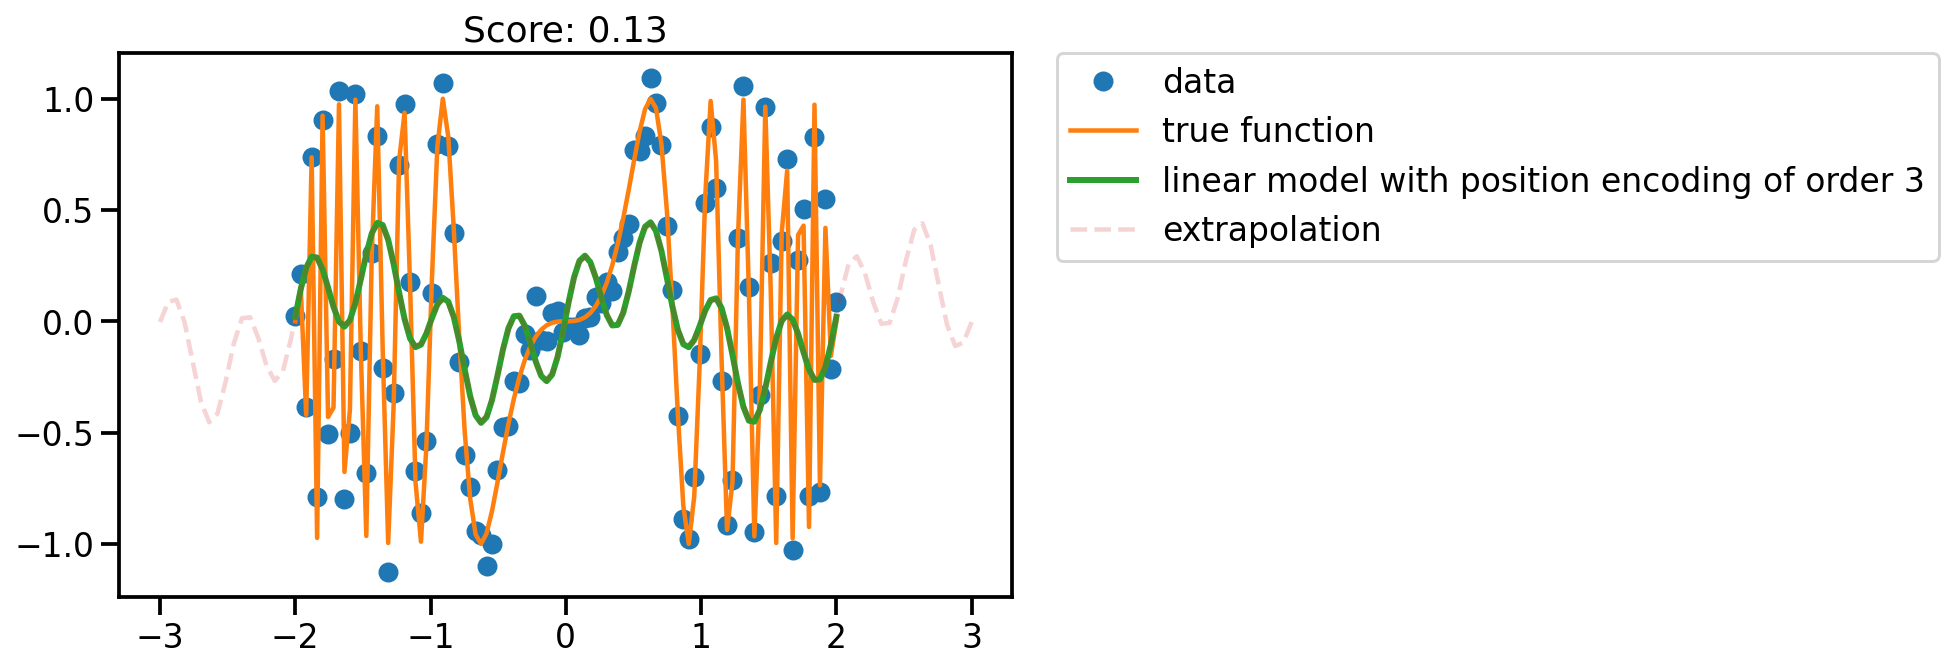

In [113]:
fit_plot(3)

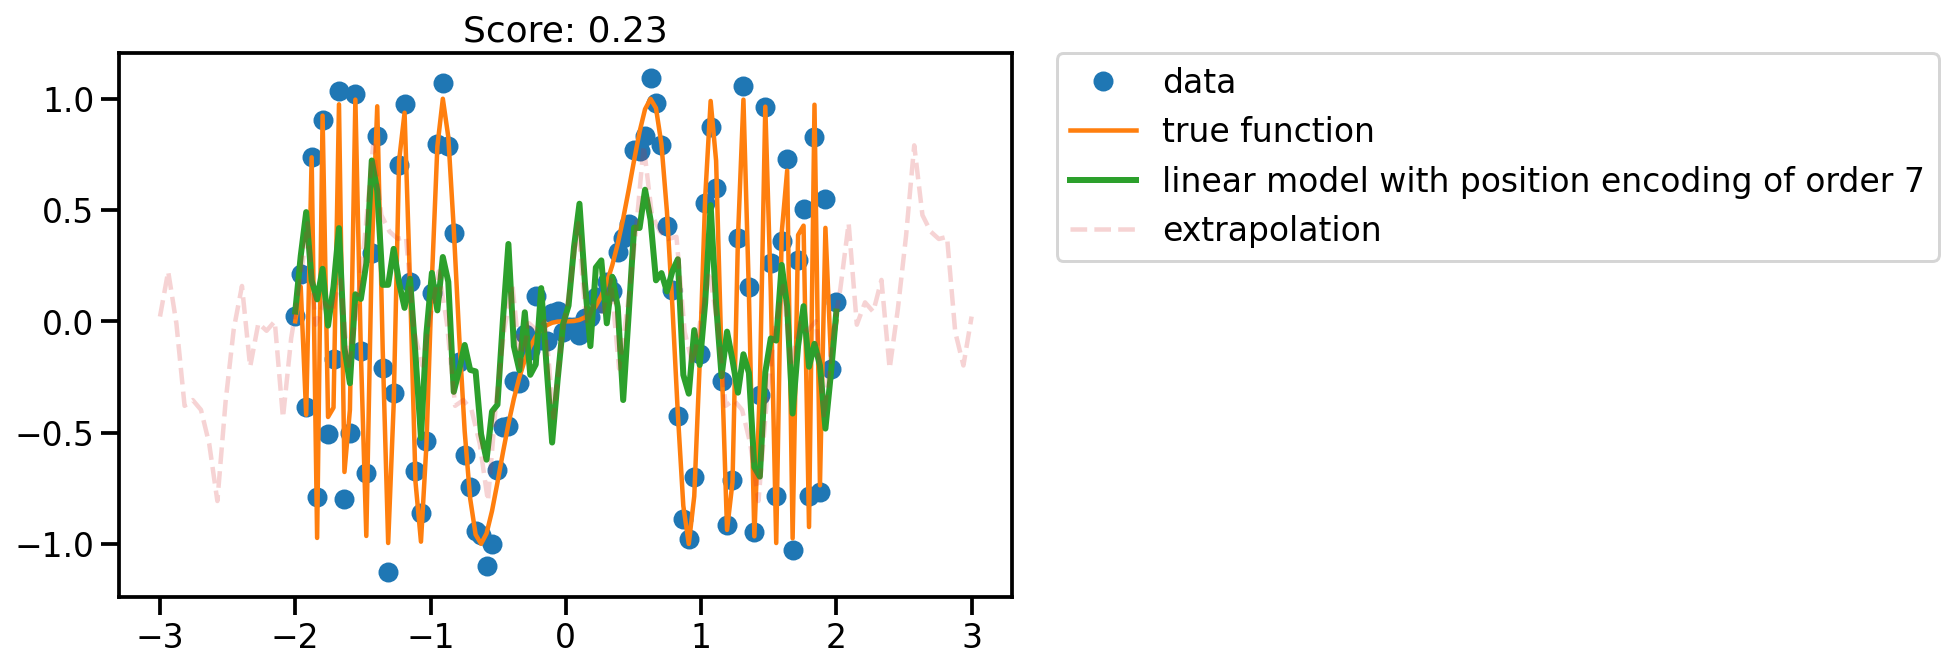

In [114]:
fit_plot(7)

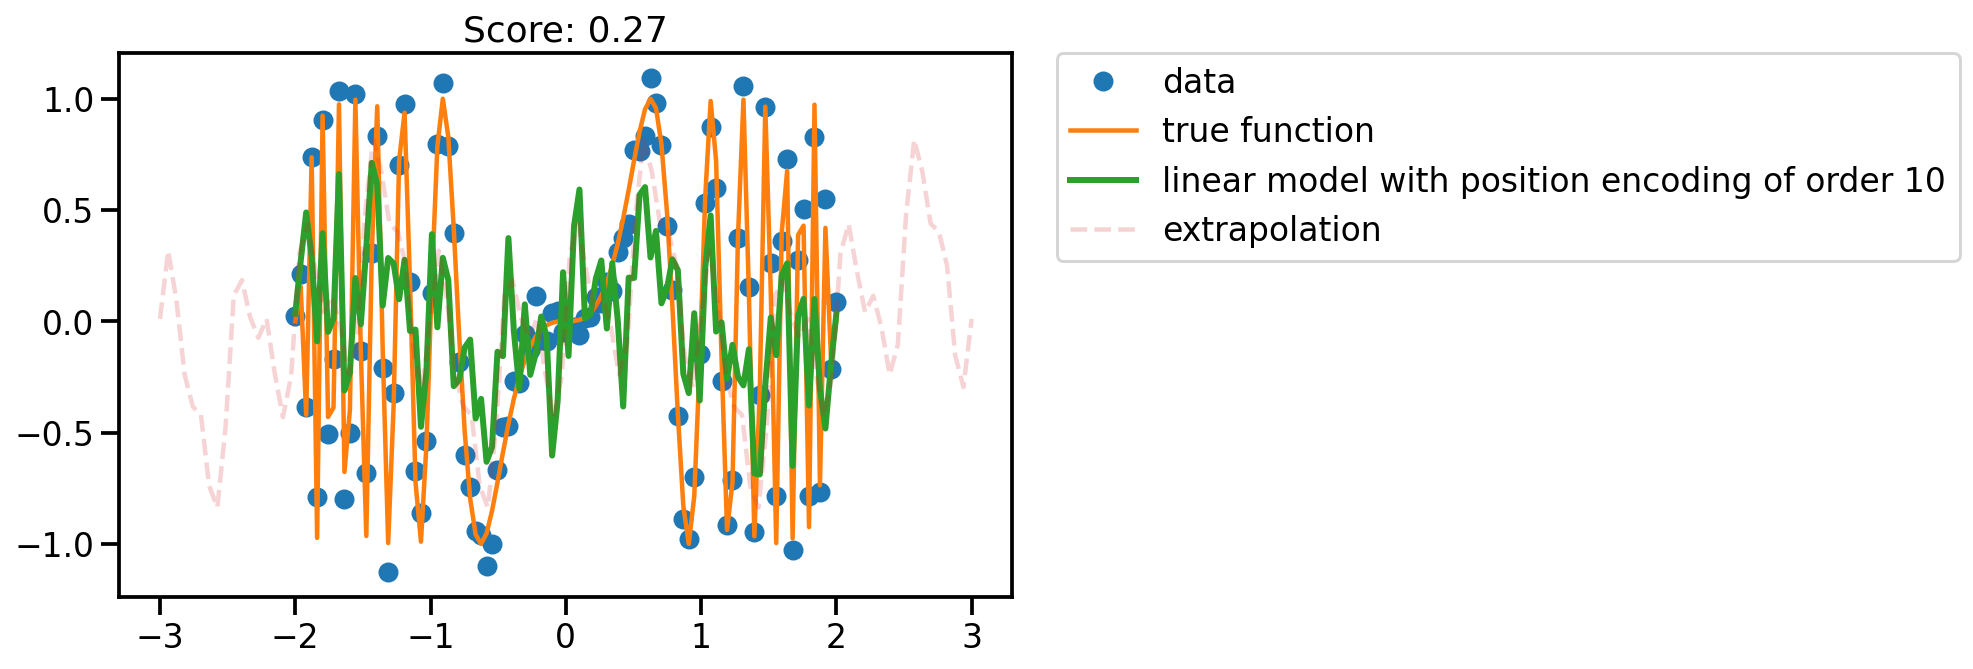

In [115]:
fit_plot(10)

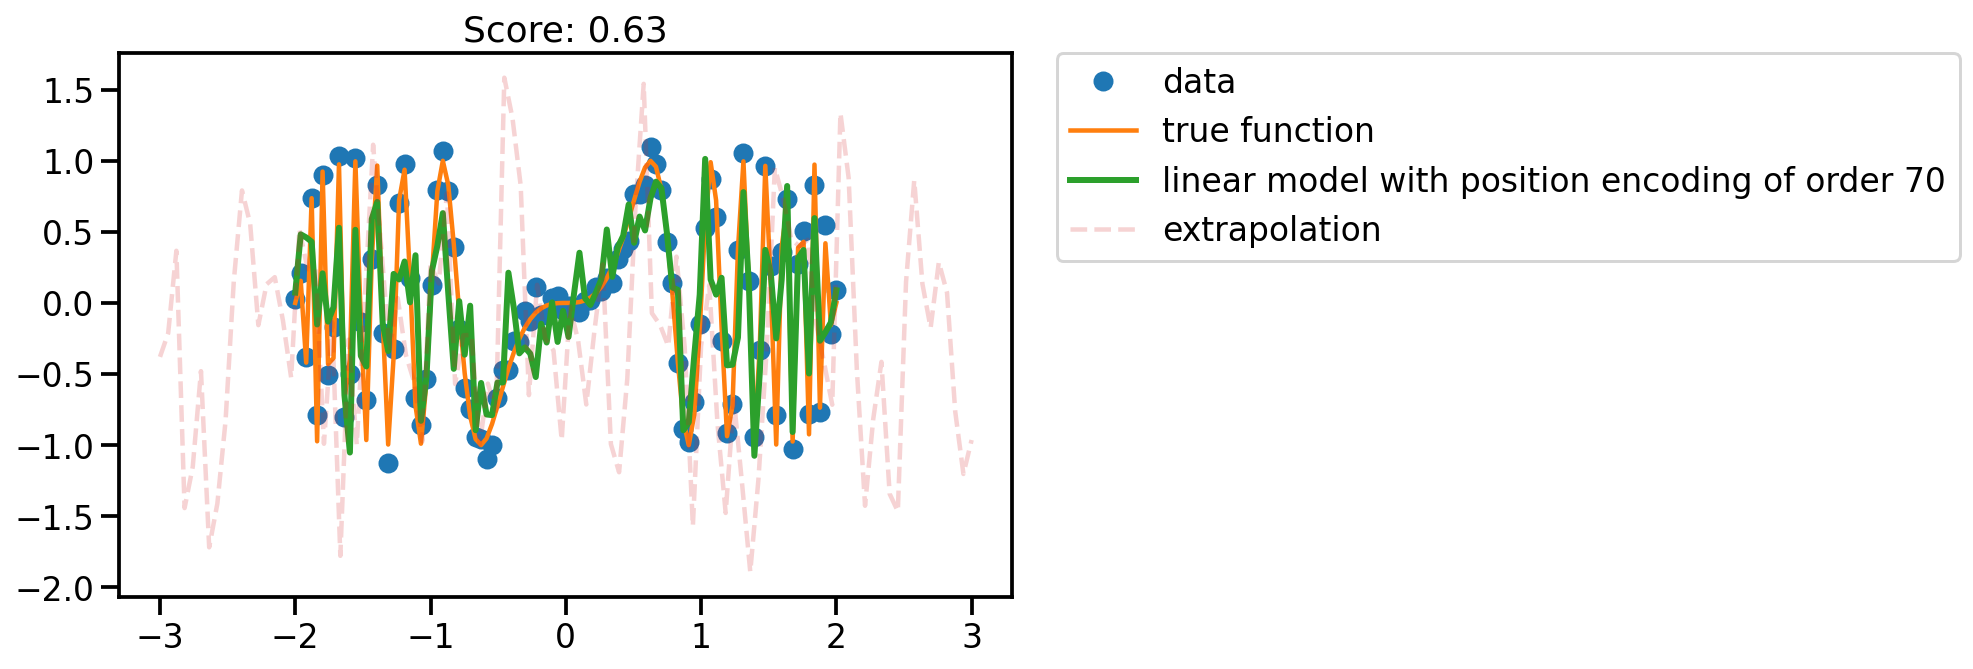

In [128]:
fit_plot(70)